#Anomaly detection - Time Series

In [ ]:
#--->>>>>>Author: Ray Espinoza<<<<<<<---

In [ ]:
!pip install numba==0.53
!pip install pycaret
!pip install --upgrade xlrd
!pip install pmdarima
!pip install arch
from pycaret.anomaly import *
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from arch.unitroot import PhillipsPerron as PP
from arch.unitroot import DFGLS
import plotly.graph_objects as go
import plotly.express as px

In [3]:
datos = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Anomaly Detection/Inflation.xls")
datos['observation_date']=pd.to_datetime(datos['observation_date'])
datos.head()

,observation_date,Monthly_CPI,Monthly_Inflation,Monthly_Rate,Bank Rate
0,1960-01-01,1.678984,NaN,NaN,4.0
1,1960-02-01,1.678984,1.000000,0.000000,4.0
2,1960-03-01,1.664416,0.991323,-0.867679,4.0
3,1960-04-01,1.678984,1.008753,0.875274,4.0
4,1960-05-01,1.689910,1.006508,0.650759,4.0


In [4]:
# Eliminamos la variable no relevantes
del (datos["Monthly_Rate"])
datos.columns
# Pasamos la fecha a formato fecha
datos["observation_date"] = pd.to_datetime(datos["observation_date"], format="%Y-%m-%d %H:%M:%S")
# Pasamos la fecha al indice para tener el formato adecuado
datos.index = datos["observation_date"]
del (datos["observation_date"])
datos.head()

,Monthly_CPI,Monthly_Inflation,Bank Rate
observation_date,,,
1960-01-01,1.678984,NaN,4.0
1960-02-01,1.678984,1.000000,4.0
1960-03-01,1.664416,0.991323,4.0
1960-04-01,1.678984,1.008753,4.0
1960-05-01,1.689910,1.006508,4.0


In [5]:
# Procedemos a analizar la inflación
datos=datos.dropna()

In [6]:
#Validamos si es necesario aplicar diferencias con estacionalidad anual.
pmdarima.arima.nsdiffs(datos["Monthly_Inflation"], m = 12)

0

In [9]:
#ERS
# Validamos hipótesis H0
ERS = DFGLS(datos["Monthly_Inflation"])
# Mostramos los valores
ERS

Test Statistic,-3.693
P-value,0.000
Lags,18


In [10]:
#Fuller
ADF = adfuller(datos["Monthly_Inflation"])
# Validamos hipótesis H0
# Mostramos los resultados
print('ADF Statistic: %f' % ADF[0])
print('p-value: %f' % ADF[1])

ADF Statistic: -7.241416
p-value: 0.000000


In [11]:
#Preparamos nuestro Dataset
datos_anomaly_detection=datos[['Monthly_Inflation']]
datos_anomaly_detection['day'] = [i.day for i in datos_anomaly_detection.index]
datos_anomaly_detection['day_name'] = [i.day_name() for i in datos_anomaly_detection.index]
datos_anomaly_detection['day_of_year'] = [i.dayofyear for i in datos_anomaly_detection.index]
datos_anomaly_detection['week_of_year'] = [i.weekofyear for i in datos_anomaly_detection.index]
datos_anomaly_detection['hour'] = [i.hour for i in datos_anomaly_detection.index]
datos_anomaly_detection['is_weekday'] = [i.isoweekday() for i in datos_anomaly_detection.index]

In [12]:
datos_anomaly_detection.head()

,Monthly_Inflation,day,day_name,day_of_year,week_of_year,hour,is_weekday
observation_date,,,,,,,
1960-02-01,1.000000,1,Monday,32,5,0,1
1960-03-01,0.991323,1,Tuesday,61,9,0,2
1960-04-01,1.008753,1,Friday,92,13,0,5
1960-05-01,1.006508,1,Sunday,122,17,0,7
1960-06-01,1.008621,1,Wednesday,153,22,0,3


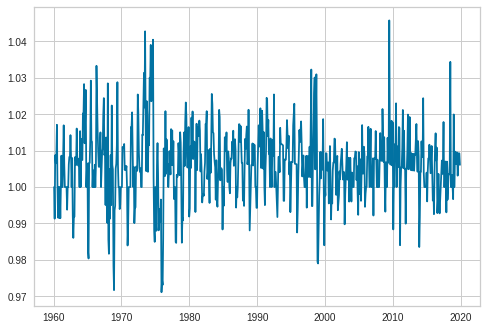

In [13]:
plt.plot(datos["Monthly_Inflation"])

In [14]:
# init setup
from pycaret.anomaly import *
s = setup(datos_anomaly_detection, session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(719, 7)"
2,Missing Values,False
3,Numeric Features,3
4,Categorical Features,4
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(719, 19)"
9,CPU Jobs,-1


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
        

In [16]:
# train model (ID=iforest)
iforest_model = create_model('iforest', fraction = 0.1)
iforest_model_results = assign_model(iforest_model)
iforest_model_results.head()

INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=-1, random_state=123,
    verbose=0)
INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=-1, random_state=123,
    verbose=0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : Isolation Forest
INFO:logs:Copying data
INFO:logs:(719, 9)
INFO:logs:assign_model() succesfully completed......................................


,Monthly_Inflation,day,day_name,day_of_year,week_of_year,hour,is_weekday,Anomaly,Anomaly_Score
observation_date,,,,,,,,,
1960-02-01,1.000000,1,Monday,32,5,0,1,0,-0.062175
1960-03-01,0.991323,1,Tuesday,61,9,0,2,0,-0.022572
1960-04-01,1.008753,1,Friday,92,13,0,5,0,-0.057652
1960-05-01,1.006508,1,Sunday,122,17,0,7,0,-0.071935
1960-06-01,1.008621,1,Wednesday,153,22,0,3,0,-0.072377


In [17]:
# Validamos
iforest_model_results[iforest_model_results['Anomaly'] == 1].head()

,Monthly_Inflation,day,day_name,day_of_year,week_of_year,hour,is_weekday,Anomaly,Anomaly_Score
observation_date,,,,,,,,,
1961-01-01,0.991453,1,Sunday,1,52,0,7,1,0.011164
1962-12-01,0.986056,1,Saturday,335,48,0,6,1,0.002667
1963-01-01,0.991919,1,Tuesday,1,1,0,2,1,0.002342
1963-02-01,0.991853,1,Friday,32,5,0,5,1,0.005600
1963-12-01,1.015355,1,Sunday,335,48,0,7,1,0.001382


In [49]:
# plot Monthly Inflation on y-axis and date on x-axis
fig = px.line(iforest_model_results, x=iforest_model_results.index, y='Monthly_Inflation', title='Monthly Inflation – Unsupervised Anomaly Detection',template = 'plotly_dark')

# List of outlier_monthly_inflation
outlier_monthly_inflation = iforest_model_results[iforest_model_results['Anomaly'] == 1].index

# obtain y=monthly_inflation of anomalies to plot
y_values = [iforest_model_results.loc[i]['Monthly_Inflation'] for i in outlier_monthly_inflation]
fig.add_trace(go.Scatter(x=outlier_monthly_inflation, y=y_values, mode='markers', name = 'Anomaly' ,marker=dict(symbol="diamond",color='red',size=10,line=dict(width=2, color="DarkSlateGrey"))))

# display
fig.show()